In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Nguồn dữ liệu

In [2]:
df = pd.read_csv('C:\\CODE\\Project1\\hmeq.csv', header = 0, sep = ',') # link data đã tải xuống
# nguồn: https://www.kaggle.com/datasets/ajay1735/hmeq-data?resource=download

# Bộ dữ liệu ban đầu

In [3]:
df = pd.DataFrame(df)
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [1]:
import os
file_input = 'hmeq.csv'
file_size = os.path.getsize(file_input)
# Chuyển đổi sang MB
file_size_mb = file_size / (1024 ** 2)
print(f'Kích thước bộ dữ liệu đầu vào: {file_size_mb:.2f} MB')

Kích thước bộ dữ liệu đầu vào: 0.38 MB


# I. Tiền xử lý dữ liệu

### I.1. Xử lý giá trị ngoại lệ

##### I.1.1. Phát hiện giá trị ngoại lệ của mỗi cột bằng biểu đồ hộp (Box plot)

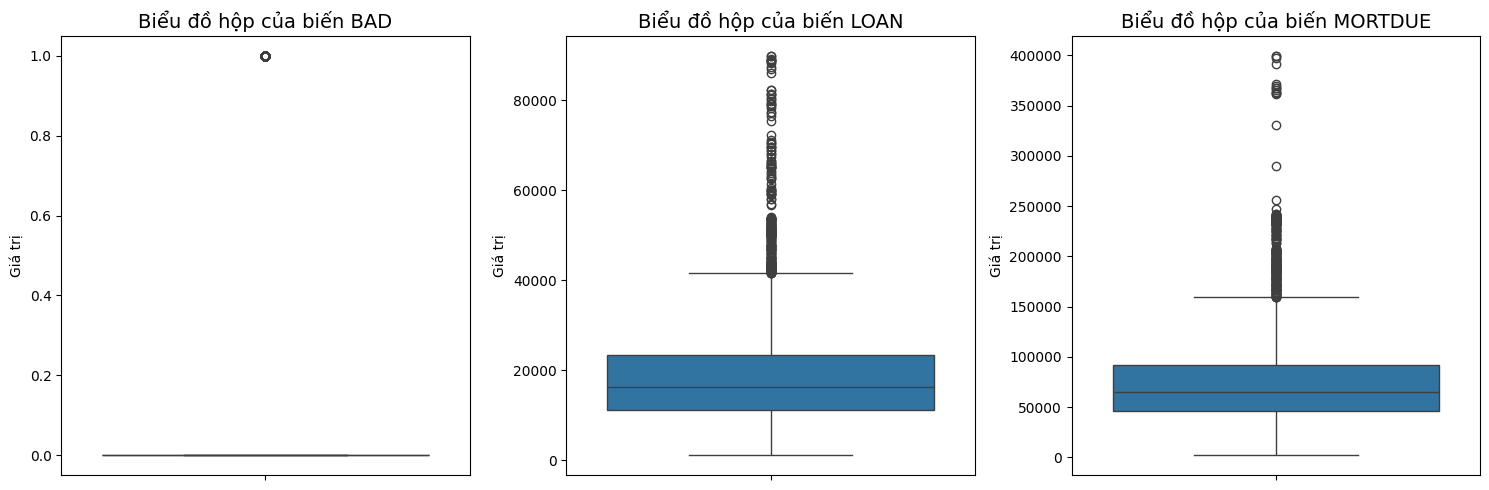

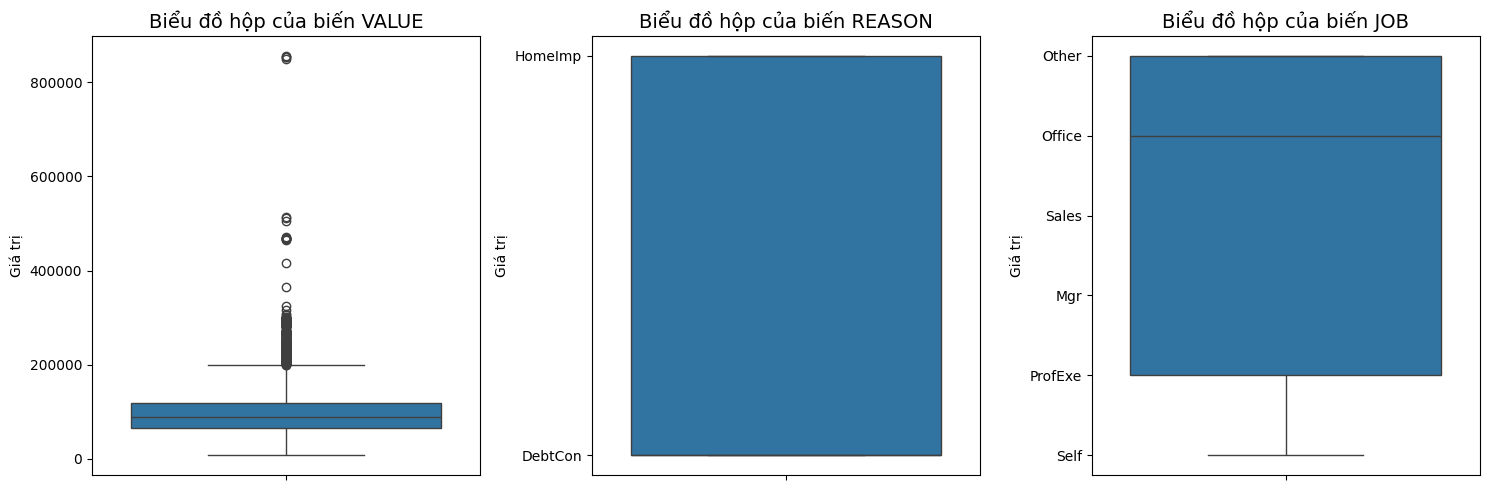

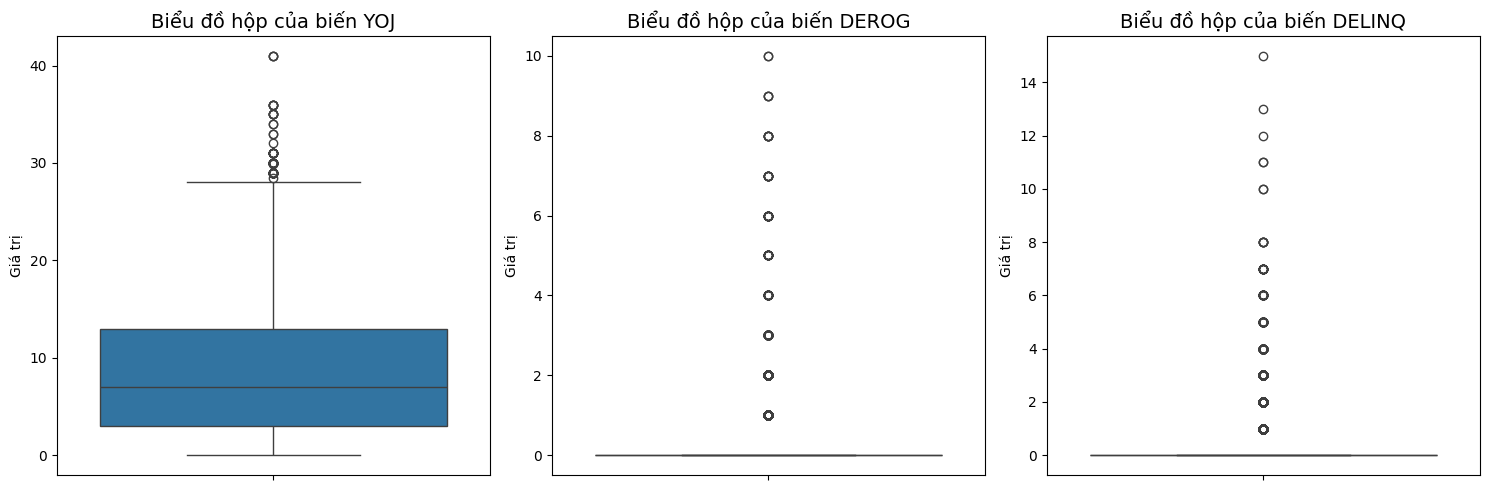

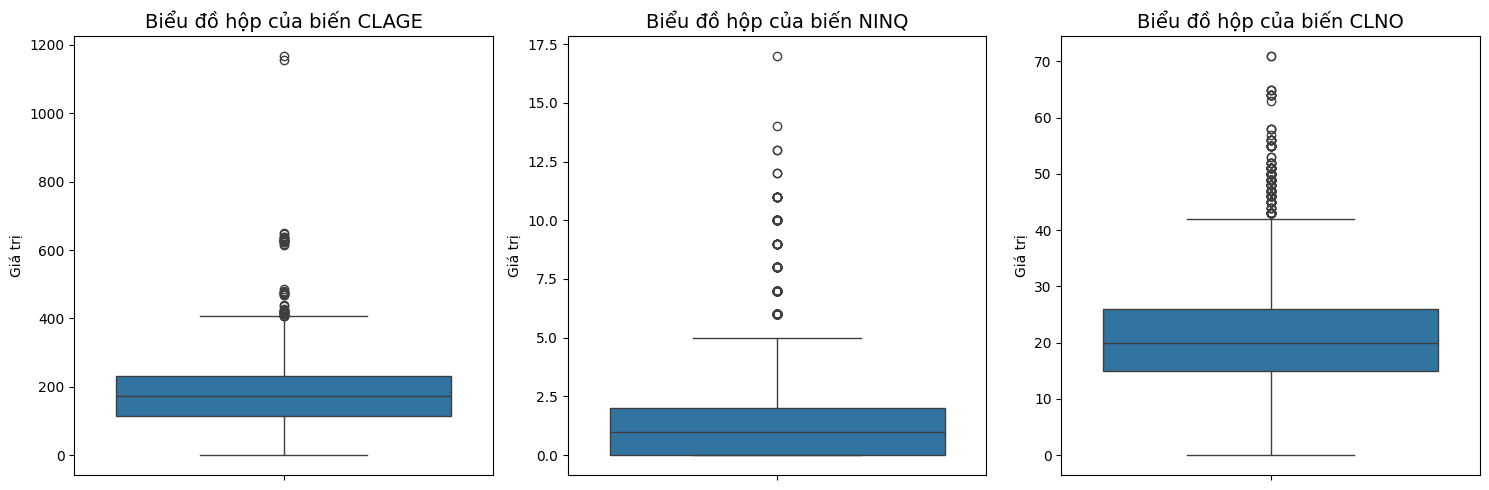

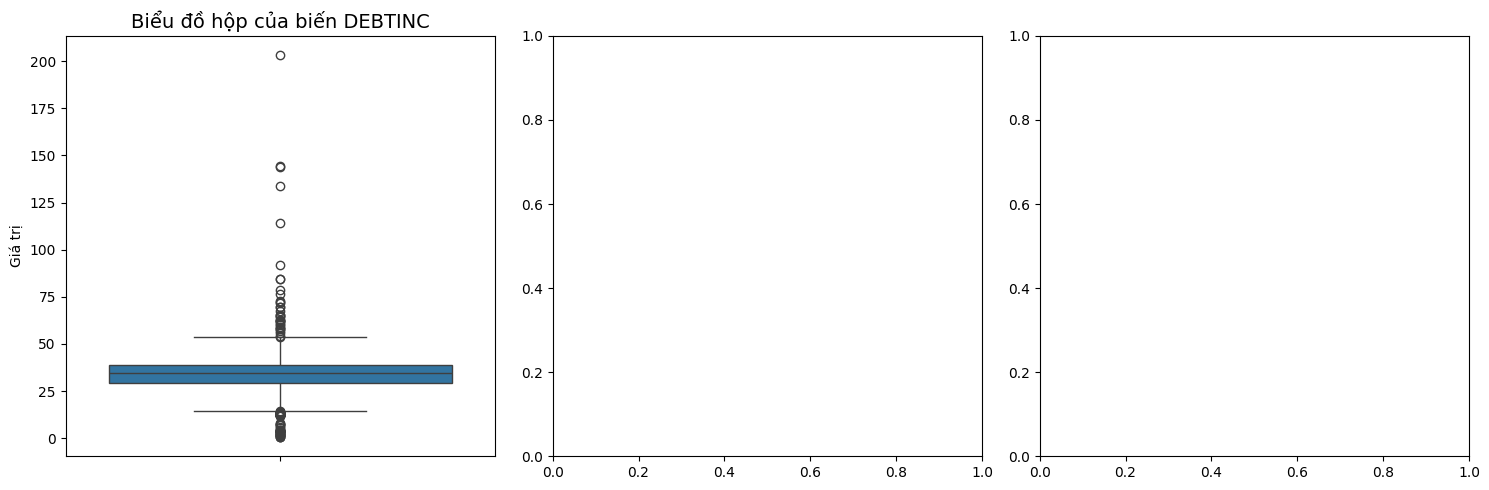

In [5]:
num_cols = len(df.columns)
num_pairs = num_cols // 3  # Số lượng cặp cột

# Nếu số lượng cột không chia hết cho 3, cần tăng số lượng cặp cột lên 1
if num_cols % 3 != 0:
    num_pairs += 1

for i in range(num_pairs):
    # Tạo subplot cho mỗi cặp cột
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Vẽ biểu đồ boxplot cho cột thứ nhất trong cặp
    col_index = i * 3
    if col_index < num_cols:
        sns.boxplot(y=df.iloc[:, col_index], ax=axs[0])
        axs[0].set_title(f'Biểu đồ hộp của biến {df.columns[col_index]}',fontsize=14)
        axs[0].set_ylabel('Giá trị')

    # Vẽ biểu đồ boxplot cho cột thứ hai trong cặp
    col_index = i * 3 + 1
    if col_index < num_cols:
        sns.boxplot(y=df.iloc[:, col_index], ax=axs[1])
        axs[1].set_title(f'Biểu đồ hộp của biến {df.columns[col_index]}',fontsize=14)
        axs[1].set_ylabel('Giá trị')

    # Vẽ biểu đồ boxplot cho cột thứ ba trong cặp
    col_index = i * 3 + 2
    if col_index < num_cols:
        sns.boxplot(y=df.iloc[:, col_index], ax=axs[2])
        axs[2].set_title(f'Biểu đồ hộp của biến {df.columns[col_index]}',fontsize=14)
        axs[2].set_ylabel('Giá trị')

    plt.tight_layout()
    plt.show()


##### I.1.2. Xử lý giá trị ngoại lệ của cột CLAGE

Tại sao lại phải xử lý giá trị ngoại lệ của cột CLAGE? Từ biểu đồ hộp của CLAGE, ta có thể thấy rằng có một số giá trị ngoại lệ nằm xa ở phía trên của phần hộp gần đến con số 1200 mà CLAGE mô tả số tháng mà khách hàng mở hạn mức tín dụng đầu tiên cho đến thời điểm hiện tại thì tức là mở gần 100 năm, điều này rất vô lý vì vậy ta sẽ xử lý các giá trị ngoại lai này bằng cách cắt (clip) về giá trị cực đại của biều đồ hộp của biến CLAGE.

In [6]:
# Xử lý các giá trị ngoại lệ bằng cách cắt (clip) về giá trị cực tiểu và cực đại của Boxplot

from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)
    


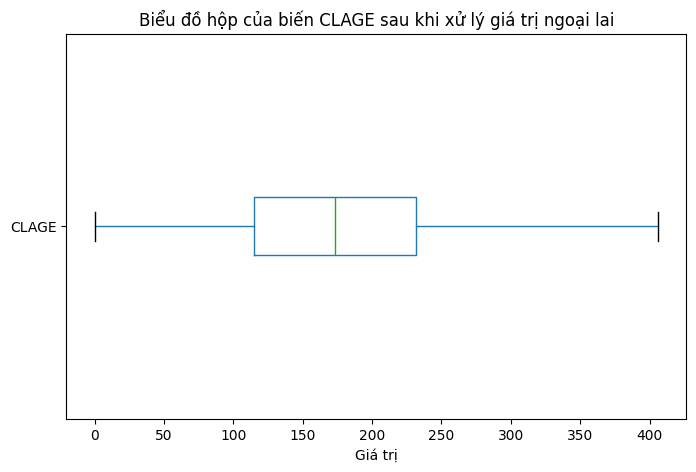

In [7]:
# Biểu đồ hộp của biến CLAGE sau khi xử lý giá trị ngoại lai
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df["CLAGE"])

plt.figure(figsize=(8, 5))
clipped_total_rooms.to_frame().boxplot(vert=False)
plt.title("Biểu đồ hộp của biến CLAGE sau khi xử lý giá trị ngoại lai")
plt.grid(False)
plt.xlabel("Giá trị")
plt.savefig('pictures/Biểu đồ hộp của biến CLAGE sau khi xử lý giá trị ngoại lai.png')
plt.show()

In [8]:
# cập nhật lại dữ liệu
df["CLAGE"] = clipped_total_rooms

### I.2. Xử lý giá trị còn thiếu (null/nan)

##### I.2.1. Thống kê số lượng giá trị null ở mỗi cột 

In [9]:
null_counts_each_column = df.isnull().sum()
null_counts_each_column

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

##### I.2.2. Xử lý giá trị null/nan của biến định lượng

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
list_columns_number_null = [
    'MORTDUE',
    'VALUE',
    'YOJ',
    'DEROG',
    'DELINQ',
    'CLAGE',
    'NINQ',
    'CLNO',
    'DEBTINC'
]

for column in list_columns_number_null:
    imputer.fit(df[[column]])
    df[column] = imputer.transform(df[[column]])

##### I.2.3. Xử lý giá trị null/nan của biến phân loại

In [11]:

# Xử lý giá trị còn thiếu cho biến phân loại REASON
df['REASON'] = df['REASON'].fillna('Unknown')

# Xử lý giá trị còn thiếu cho biến phân loại JOB
df['JOB'] = df['JOB'].fillna('Other')

Kiểm tra lại số lượng null của mỗi cột sau khi xử lý 

In [12]:
null_counts_each_column_result = df.isnull().sum()
null_counts_each_column_result

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

##### I.2.4. Bộ dữ liệu sau khi xử lý null

In [13]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,Unknown,Other,8.922268,0.25457,0.449442,178.635811,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882


### I.3. Chuyển đổi định dạng

In [14]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

# II. Khám phá dữ liệu

### II.1. Mô tả thống kê 

In [15]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,178.635811,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,7.239301,0.794198,1.071002,78.387607,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,406.230642,17.000000,71.000000,203.312149


### II.2. Thống kê trạng thái nợ xấu của người vay
(BAD qua Pie Chart (biểu đồ tròn))

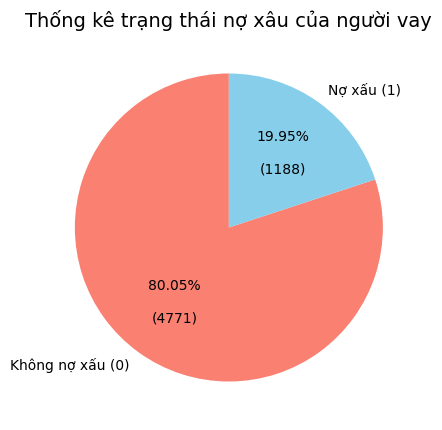

In [16]:
bad_counts = df['BAD'].value_counts()
# Tạo biểu đồ tròn
plt.figure(figsize=(5, 5))
plt.pie(bad_counts, labels=['Không nợ xấu (0)', 'Nợ xấu (1)'], 
        autopct=lambda pct: f'{pct:.2f}%\n\n({int(pct/100.*bad_counts.sum()):d})', 
        startangle=90, colors=['salmon', 'skyblue'])
plt.title('Thống kê trạng thái nợ xâu của người vay',fontsize=14)

plt.savefig('pictures/Thống kê trạng thái nợ xấu của người vay.png')

plt.show()

Từ biểu đồ trên, ta thấy 'Nợ xấu' chiếm khoảng 19,95% tổng số khoản vay với số lượng cụ thể là 1188 khoản vay, tức chiểm 1/5 tổng số khoản vay trong bộ dữ liệu được xem là có vấn đề về thanh toán (các khoản vay có thể đã vỡ nợ, hoặc trễ hạn thanh toán). Còn 'Không nợ xấu' chiếm 80.05% tổng số khoản vay tương ứng với 4771 khoản vay, cho thấy phần lớn các khoản vay trong bộ dữ liệu này thanh toán đúng hạn hoặc không có vấn đề nghiêm trọng về tài chính.

Nhưng tỷ lệ nợ xấu chiếm khá là cao khiến cho ngân hàng hay tổ chức tín dụng có thể đang đối mặt với rủi ro tín dụng đáng kể.

### II.3. Phân phối số tiền của khoản vay được yêu cầu
(biến LOAN, sử dụng biểu đồ histogram)

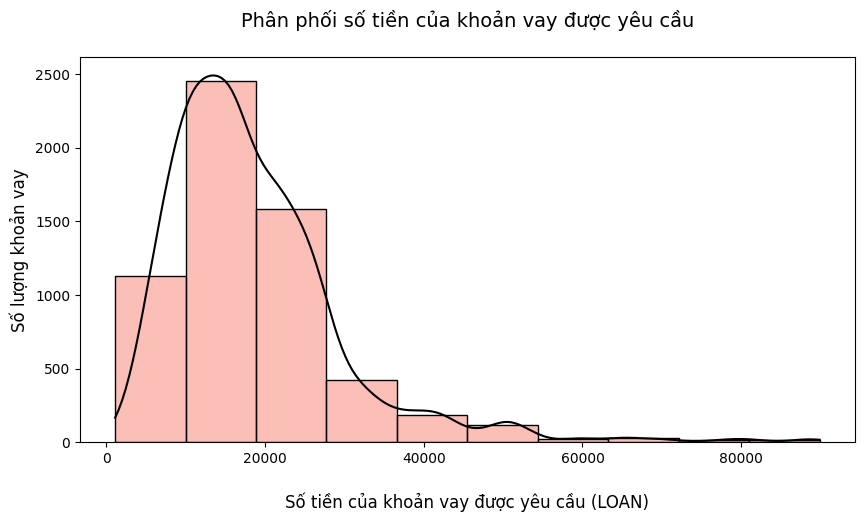

In [17]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['LOAN'], bins=10, color='salmon', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối số tiền của khoản vay được yêu cầu\n',fontsize=14)
plt.xlabel('\nSố tiền của khoản vay được yêu cầu (LOAN)',fontsize=12)
plt.ylabel('Số lượng khoản vay',fontsize=12)
plt.grid(False) 
plt.savefig('pictures/Phân phối số tiền của khoản vay được yêu cầu.png')
plt.show()

Biểu đồ trên, biến LOAN đã được chia thành 10 khoảng giá trị (bins). Phân phối có hình dạng lệch trái, với số lượng khoản vay giảm dần theo sự tăng của số tiền vay. Đỉnh cao nhất của phân phối tập trung ở khoảng thấp từ 10 000$ đến 20 000$, đây là mức số tiền vay phổ biến nhất.

Điều này có thể phản ánh khách hàng nhắm vào những khoản vay nhỏ và trung bình. 

### II.4. Phân phối số tiền nợ trên khoản vay thế chấp hiện tại
biến MORTDUE 

biểu đồ histogram

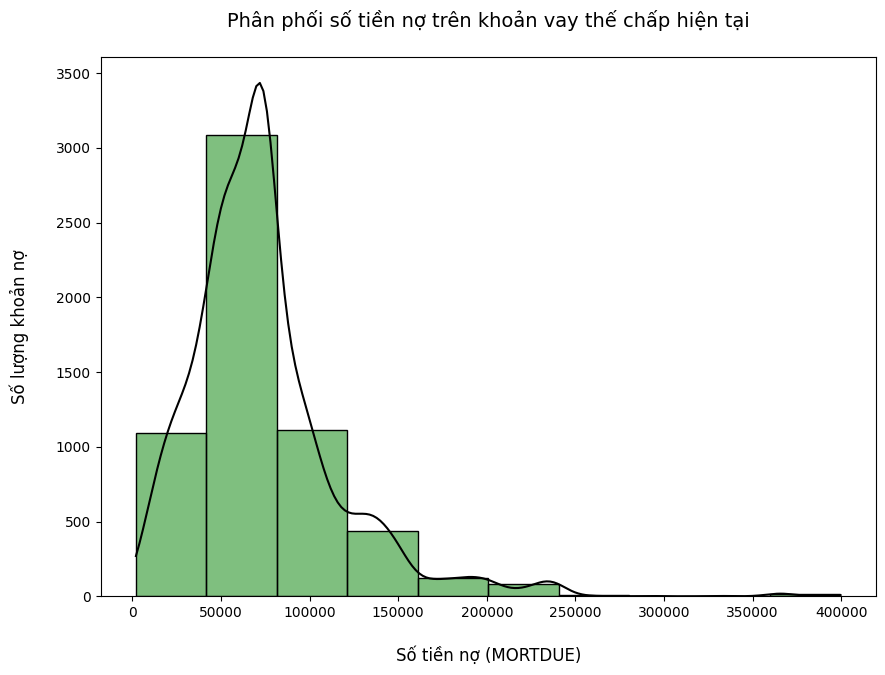

In [18]:
plt.figure(figsize=(10, 7))
a = sns.histplot(df['MORTDUE'], bins=10, color='green', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối số tiền nợ trên khoản vay thế chấp hiện tại\n',fontsize=14)
plt.xlabel('\nSố tiền nợ (MORTDUE)',fontsize=12)
plt.ylabel('Số lượng khoản nợ\n',fontsize=12)
plt.grid(False) 
plt.savefig('pictures/Phân phối số tiền nợ trên khoản vay thế chấp hiện tại.png')
plt.show()

Ở đây, biến MORTDUE cũng được chia thành 10 khoảng giá trị (bins). Từ biểu đồ có thể thấy rằng phân phối có xu hướng tập trung nhiều ở khoảng thấp < 150 000$. Đỉnh cao nhất nằm ở khoảng 25 000$ - 100 000$. Giảm dần khi số tiền nợ tăng lên.

Sự tập trung ở các khoản nợ nhỏ có thể giảm rủi ro tổng thể cho ngân hàng hay tổ chức tài chính.

### II.5. Phân phối giá trị của tài sản hiện tại

biến VALUE

biểu đồ histogram

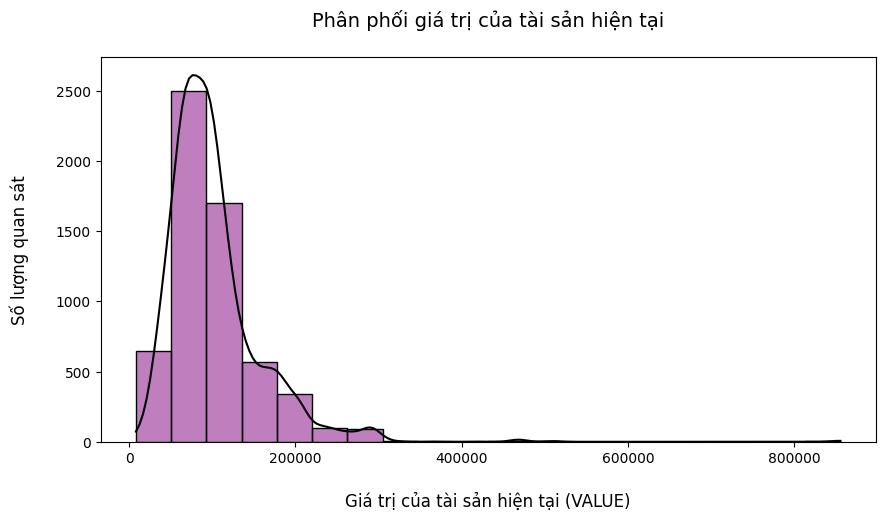

In [19]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['VALUE'], bins=20, color='purple', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối giá trị của tài sản hiện tại\n',fontsize=14)
plt.xlabel('\nGiá trị của tài sản hiện tại (VALUE)',fontsize=12)
plt.ylabel('Số lượng quan sát\n',fontsize=12)
plt.grid(False) 
# for rect in a.patches:
#     height = rect.get_height()
#     a.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5),
#                 textcoords='offset points', ha='center', va='bottom')
plt.savefig('pictures/Phân phối giá trị của tài sản hiện tại.png')
plt.show()

Biểu đồ này thể hiện phân phối của giá trị tài sản hiện tại (VALUE) được dùng để thế chấp cho các khoản vay với VALUE được chia thành 10 khoảng giá trị (bins). Có thể thấy phần lớn tài sản hiện tại có giá trị tập trung dưới mức 400 000$. Sự tập trung cao ở các giá trị thấp có thể phản ánh tính chất của thị trường nhà ở tại khu vực mà dữ liệu được thu thập, nơi giá nhà cơ bản thấp hơn so với các khu vực khác hoặc có thể đó là một đặc điểm chung của phân khúc khách hàng mà ngân hàng hoặc tổ chức tín dụng đang hướng tới. Điều này có thể khiến ngân hàng hay tổ chức tài chính gặp rủi ro về vấn đề giá trị của tài sản hiện tại không đủ đảm bảo để trả nợ trong trường hợp khách hàng vỡ nợ.

### II.6. Thống kê mục đích sử dụng khoản vay của khách hàng

biến REASON

biểu đồ cột

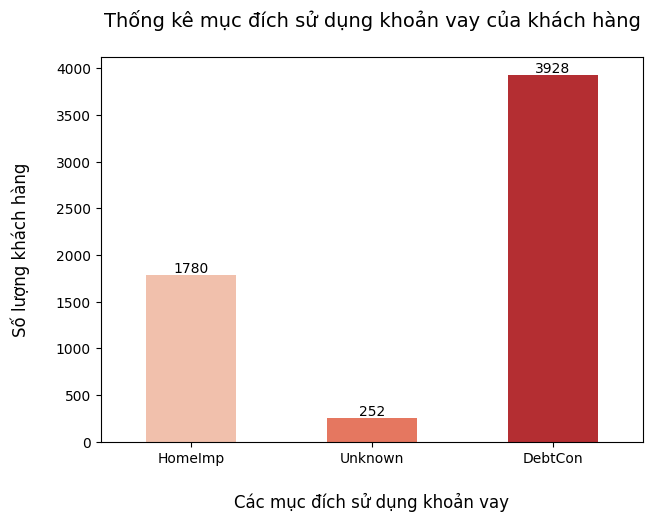

In [20]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='REASON', hue='REASON', palette='Reds', width=0.5, legend=False)
plt.title('Thống kê mục đích sử dụng khoản vay của khách hàng\n',fontsize=14)
plt.xlabel('\nCác mục đích sử dụng khoản vay',fontsize=12)
plt.ylabel('Số lượng khách hàng\n',fontsize=12)

# Thêm số liệu vào từng cột
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.savefig('pictures/Thống kê mục đích sử dụng khoản vay của khách hàng')

plt.show()


Từ biểu đồ thấy rằng khách hàng chủ yếu sử dụng khoản vay với mục đích là "Homelmp" (home improvement - cải thiện nhà cửa) và "DebtCon" (debt consolidation - tổng hợp nợ), trong đó "DebtCon" chiếm số lượng nhiều nhất (3928) cho thấy khách hàng đang có nhiều khoản nợ và muốn tổng hợp chúng thành một khoản nợ duy nhất để dễ dàng quản lý. Ngoài ra, có thể thấy khách hàng cũng đang gặp khó khăn về tài chính.

Tuy nhiên, vẫn còn một số khách hàng chưa có thông tin nên ta sẽ làm sạch dữ liệu ở phần sau.

### II.7. Thống kê số lượng nghề nghiệp

biến JOB 

biểu đồ cột

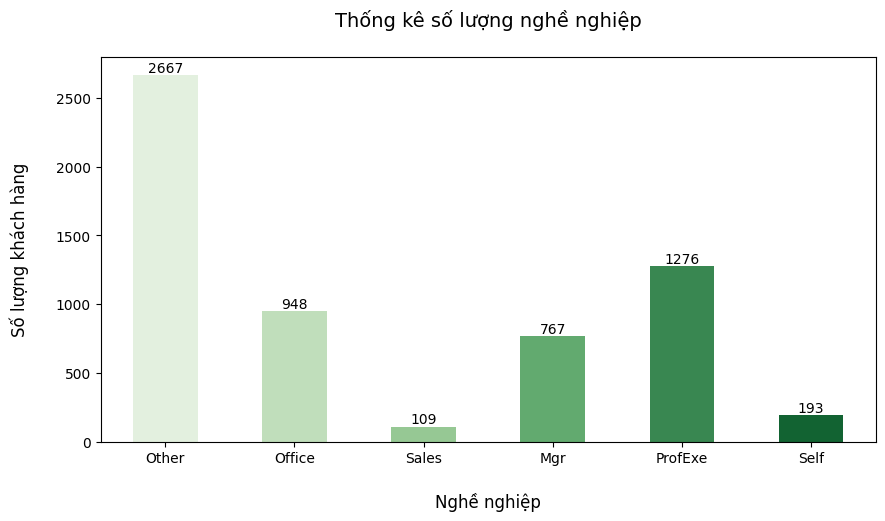

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='JOB', hue='JOB', palette='Greens', width=0.5, legend=False)
plt.title('Thống kê số lượng nghề nghiệp\n',fontsize=14)
plt.xlabel('\nNghề nghiệp',fontsize=12)
plt.ylabel('Số lượng khách hàng\n',fontsize=12)

# Thêm số liệu vào từng cột
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.savefig('pictures/Thống kê số lượng nghề nghiệp')

plt.show()

Từ biểu đồ có thể thấy đa dạng về nghề nghiệp, với nghề cụ thể thì thấy rất nhiều khách hàng làm chuyên gia hay điều hành (ProfExe - Professional/Executive) chiếm 1276 người, sau đó đến công việc văn phòng (Office) chiếm 948 người, làm quản lý (Mgr) chiếm 767, tiếp đến tự kinh doanh (Self) chiếm 193 người, và cuối cùng làm công việc liên quan đến bán hàng (Sales) chiếm 109 người. Phần lớn thì mọi người làm công việc khác chiếm 2667 người.

Tuy nhiên, có những khách hàng chưa có thông tin nghề nghiệp cho nên ta sẽ làm sạch dữ liệu ở phần sau.

### II.8. Phân phối số năm kinh nghiệp trong nghề nghiệp hiện tại

biến YOJ (Years of Job)

biểu đồ histogram

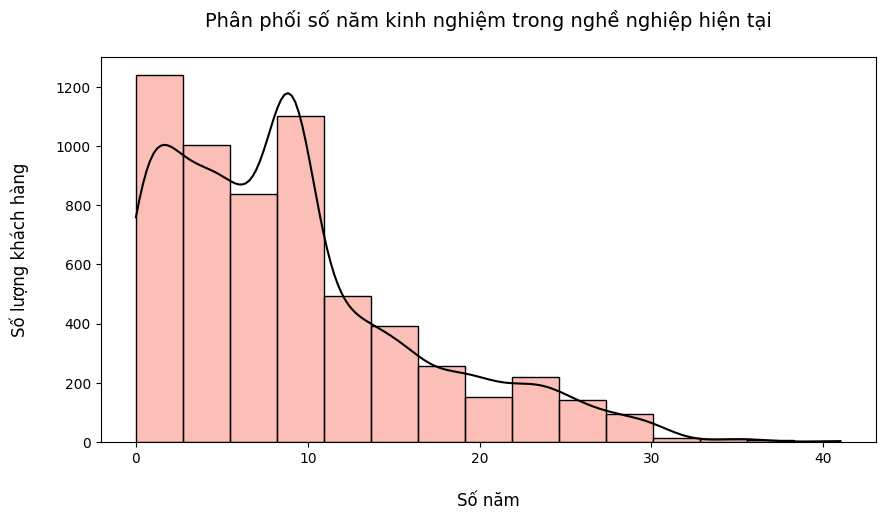

In [22]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['YOJ'], bins=15, color='salmon', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối số năm kinh nghiệm trong nghề nghiệp hiện tại\n',fontsize=14)
plt.xlabel('\nSố năm',fontsize=12)
plt.ylabel('Số lượng khách hàng\n',fontsize=12)
plt.grid(False) 
plt.savefig('pictures/Phân phối số năm kinh nghiệm trong nghề nghiệp hiện tại.png')
plt.show()

Từ biểu đồ trên, biến YOJ được chia thành 15 khoảng giá trị (bins), có thể thấy rằng đa số khách hàng có số năm kinh nghiệm trong nghề nghiệp của họ nhỏ hơn 10 năm, với số lượng giảm dần khi số năm kinh nghiệm tăng lên. Điều này cũng phản ánh họ đang ở giai đoạn đầu sự nghiệp nhiều hơn những người có kinh nghiệm lâu năm.

### II.9. Thống kê số lượng báo cáo không tín nhiệm

biến DEROG

biểu đồ đường

<Figure size 1000x500 with 0 Axes>

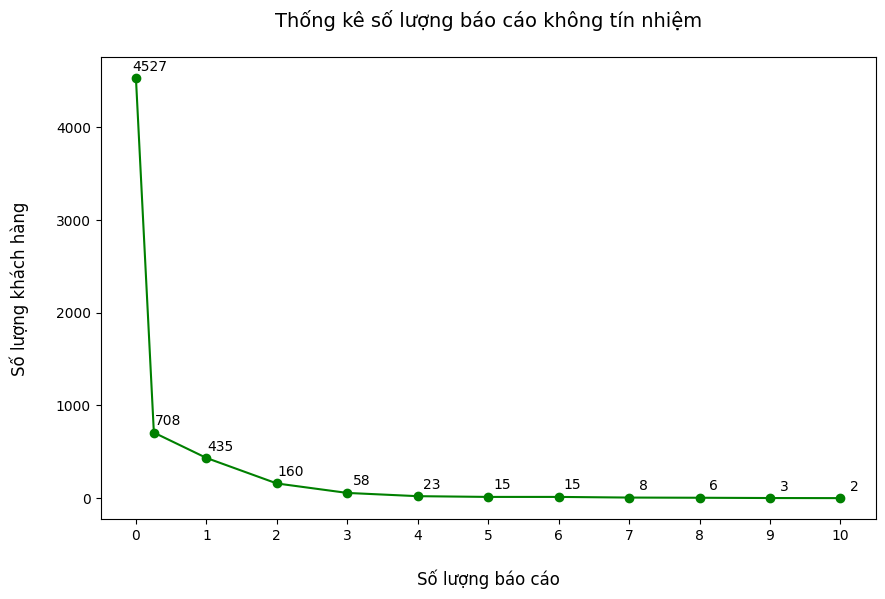

In [23]:
plt.figure(figsize=(10, 5))

degrog_counts = df['DEROG'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(degrog_counts.index, degrog_counts.values, marker='o', linestyle='-', color='green')

plt.title('Thống kê số lượng báo cáo không tín nhiệm\n', fontsize=14)
plt.xlabel('\nSố lượng báo cáo', fontsize=12)
plt.ylabel('Số lượng khách hàng\n', fontsize=12)
plt.grid(False)
plt.xticks(np.arange(0, 11, 1))

for x, y in zip(degrog_counts.index, degrog_counts.values):
    plt.text(x+0.2, y+50, f'{y}', ha='center', va='bottom')

plt.savefig('pictures/Thống kê số lượng báo cáo không tín nhiệm.png')
plt.show()

Phần lớn các trường hợp không có báo cáo xấu (DEROG = 0) cụ thể là 5235 khách hàng, và chỉ có 2 khách hàng với số lượng báo cáo không tín nhiệm cao nhất là 10.  Điều này phản ánh đa số khách hàng có lịch sử tín dụng tốt, và chỉ một phần nhỏ có lịch sử tín dụng xấu.

### II.10. Thống kê số hạn mức tín dụng quá hạn

biến DELINQ

biểu đồ đường

<Figure size 1000x500 with 0 Axes>

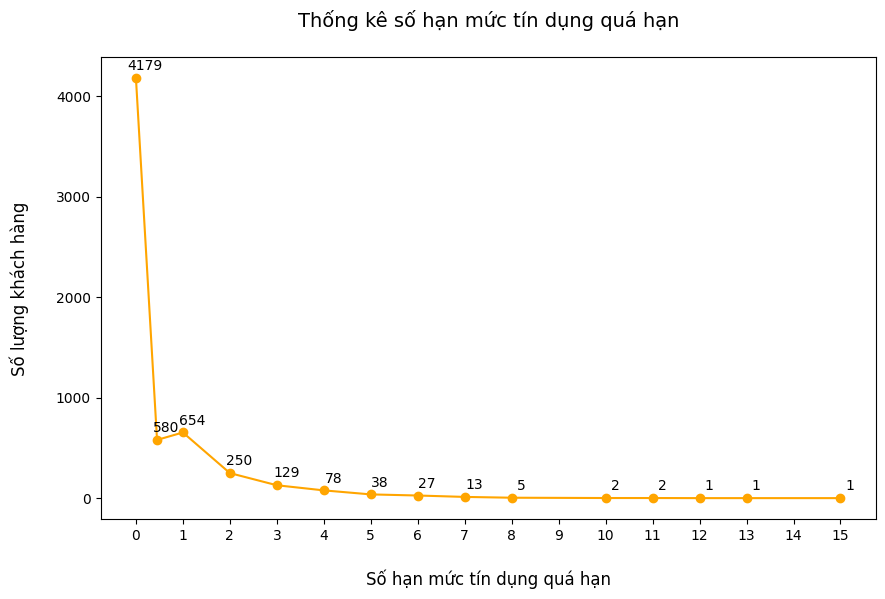

In [24]:
plt.figure(figsize=(10, 5))

degrog_counts = df['DELINQ'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(degrog_counts.index, degrog_counts.values, marker='o', linestyle='-', color='orange')

plt.title('Thống kê số hạn mức tín dụng quá hạn\n', fontsize=14)
plt.xlabel('\nSố hạn mức tín dụng quá hạn', fontsize=12)
plt.ylabel('Số lượng khách hàng\n', fontsize=12)
plt.grid(False)
plt.xticks(np.arange(0, 16, 1))

for x, y in zip(degrog_counts.index, degrog_counts.values):
    plt.text(x+0.2, y+50, f'{y}', ha='center', va='bottom')

plt.savefig('pictures/Thống kê số hạn mức tín dụng quá hạn.png')
plt.show()

Từ biểu đồ đường thấy ngay là đa số khách hàng không có hạn mức tín dụng quá hạn (DELINQ=0) cụ thể là 4759 khách hàng, phản ánh họ duy trì tình trạng tài chính khá tốt và không vượt quá hạn mức tín dụng cho phép. Và chỉ một số ít khách hàng có vấn đề trong quản lý tín dụng của mình, tức là họ không thanh toán đúng hạn cho số kỳ hạn trước đó.

### II.11. Phân phối tuổi của hạn mức tín dụng cũ nhất theo tháng

biến CLAGE

biểu đồ histogram

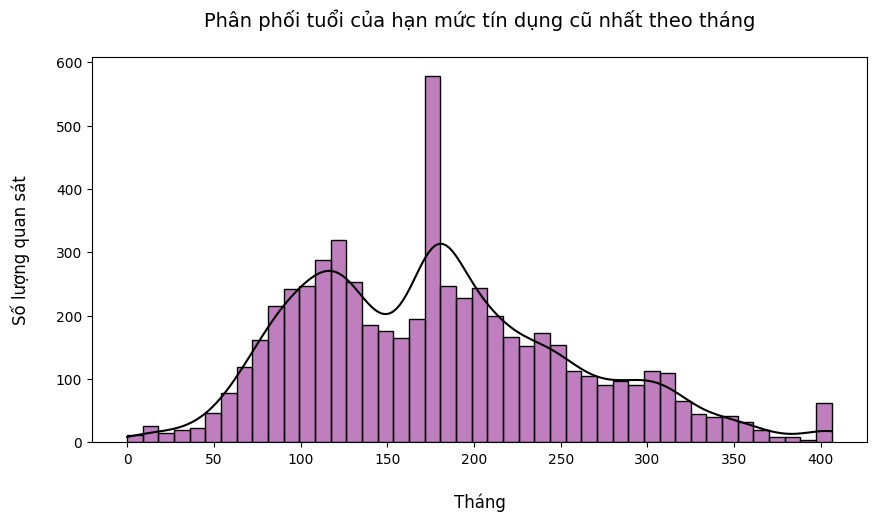

In [25]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['CLAGE'], bins=45, color='purple', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối tuổi của hạn mức tín dụng cũ nhất theo tháng\n',fontsize=14)
plt.xlabel('\nTháng',fontsize=12)
plt.ylabel('Số lượng quan sát\n',fontsize=12)
#sns.kdeplot(df['CLAGE'], color='black')
plt.grid(False) 
# for rect in a.patches:
#     height = rect.get_height()
#     a.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5),
#                 textcoords='offset points', ha='center', va='bottom')
plt.savefig('pictures/Phân phối tuổi của hạn mức tín dụng cũ nhất theo tháng.png')
plt.show()

Ở phần này, biến CLAGE được chia thành 45 khoảng giá trị (bins) bởi vì để chúng ta có cái nhìn chia tiết hơn về phân phối dữ liệu của biến này. Ta thấy rằng dữ liệu phân phối tập trung ở mức nhỏ hơn 400 tháng với đỉnh cao nhất ở khoảng 100 đến 200 tháng. Điều này phản ánh rằng hầu hết các hạn mức tín dụng cũ nhất có tuổi thọ trong khoảng từ 8 đến 33 năm. 

### II.12. Thống kê số lượng yêu cầu tín dụng gần đây

biến NINQ

biểu đồ đường

<Figure size 1000x500 with 0 Axes>

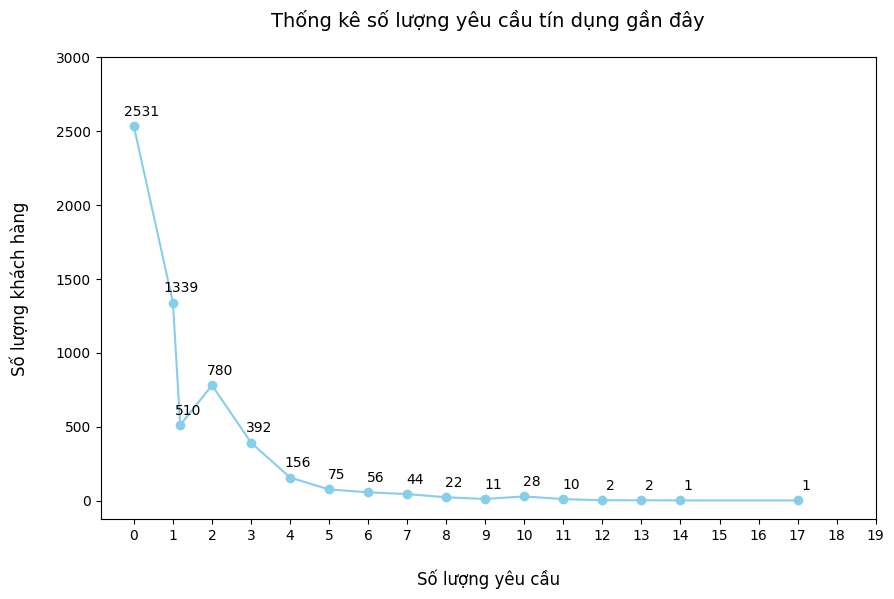

In [26]:
plt.figure(figsize=(10, 5))

degrog_counts = df['NINQ'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(degrog_counts.index, degrog_counts.values, marker='o', linestyle='-', color='skyblue')

plt.title('Thống kê số lượng yêu cầu tín dụng gần đây\n', fontsize=14)
plt.xlabel('\nSố lượng yêu cầu', fontsize=12)
plt.ylabel('Số lượng khách hàng\n', fontsize=12)
plt.grid(False)
plt.xticks(np.arange(0, 20, 1))
plt.yticks(np.arange(0, 3500, 500))

for x, y in zip(degrog_counts.index, degrog_counts.values):
    plt.text(x+0.2, y+50, f'{y}', ha='center', va='bottom')

plt.savefig('pictures/Thống kê số lượng yêu cầu tín dụng gần đây.png')
plt.show()

Phần lớn khách hàng không có yêu cầu tín dụng gần đây (NINQ=0) cụ thể là 2531 khách hàng, cho thấy hầu hết khách hàng trong khoảng thời gian này không kiểm tra lịch sử tín dụng. Tuy nhiên, cũng có một số lượng đáng kể khách hàng yêu cầu tín dụng 1 đến 3 lần. Điều này có thể chỉ ra rằng một phần khách hàng vẫn đang tìm kiếm hoặc đánh giá các lựa chọn tín dụng mới để đáp ứng nhu cầu cá nhân của họ.

### II.13. Phân phối số lượng hạn mức tín dụng 

biến CLNO

biểu đồ histogram

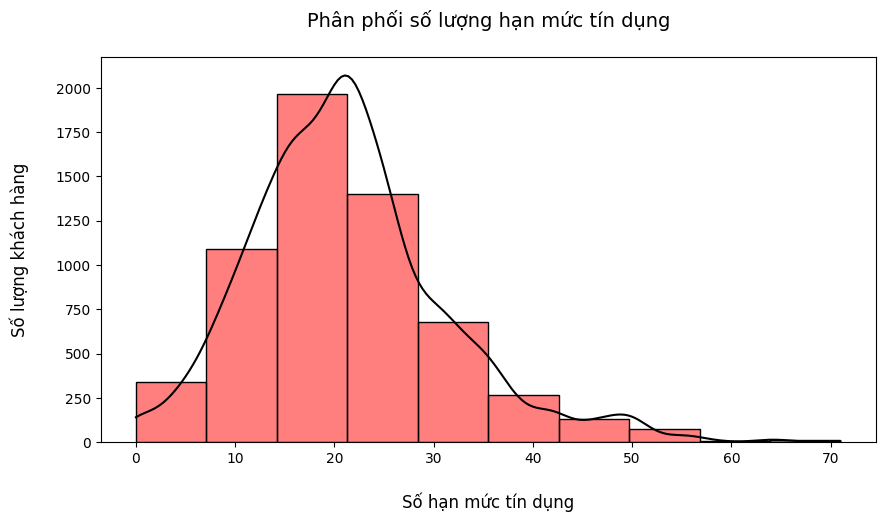

In [27]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['CLNO'], bins=10, color='red', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối số lượng hạn mức tín dụng\n',fontsize=14)
plt.xlabel('\nSố hạn mức tín dụng',fontsize=12)
plt.ylabel('Số lượng khách hàng\n',fontsize=12)
plt.grid(False) 
plt.savefig('pictures/Phân phối số lượng hạn mức tín dụng.png')
plt.show()

Biểu đồ này cho thấy phân phối số lượng hạn mức tín dụng của khách hàng với một đỉnh nổi bật ở khoảng 20 hạn mức. Đa số khách hàng có số lượng hạn mức tín dụng tập trung trong khoảng từ 10 đến 30, chỉ ra rằng đây là khoảng phổ biến nhất cho số hạn mức tín dụng mà khách hàng sở hữu. Sự giảm dần số lượng khách hàng khi số hạn mức tăng lên cho thấy chỉ có một số ít khách hàng có lượng hạn mức tín dụng rất cao.

### II.14. Phân phối tỷ lệ nợ so với thu nhập

biến DEBTINC

biểu đồ histogram

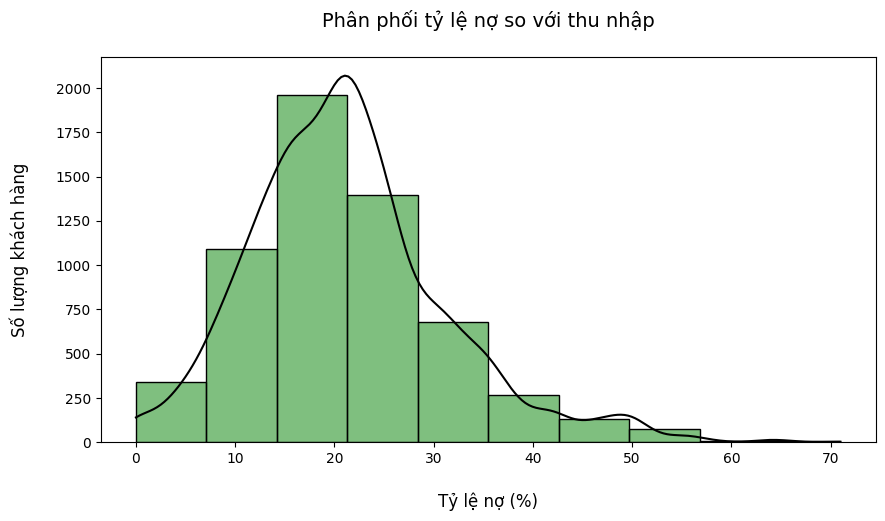

In [28]:
plt.figure(figsize=(10, 5))
a = sns.histplot(df['CLNO'], bins=10, color='green', edgecolor='black', kde=True)
a.lines[0].set_color('black')
plt.title('Phân phối tỷ lệ nợ so với thu nhập\n',fontsize=14)
plt.xlabel('\nTỷ lệ nợ (%)',fontsize=12)
plt.ylabel('Số lượng khách hàng\n',fontsize=12)
plt.grid(False) 
plt.savefig('pictures/Phân phối tỷ lệ nợ so với thu nhập.png')
plt.show()

Đỉnh của biểu đồ tập trung ở khoảng 20%, cho thấy phần lớn khách hàng có tỷ lệ nợ so với thu nhập vào khoảng này. Điều này chỉ ra rằng đa số khách hàng có mức nợ khá cân bằng so với thu nhập của họ. Số lượng khách hàng giảm dần khi tỷ lệ nợ tăng lên trên 30%, và rất ít khách hàng có tỷ lệ nợ cao so với thu nhập (trên 40%).

### II.15. Biểu đồ ma trận tương quan giữa các biến độc lập

In [29]:
# Đưa giá trị của biến phân loại về dạng số
df_heatmap = df.copy()
df_heatmap['REASON'] = df_heatmap['REASON'].map({'HomeImp': 1, 'DebtCon': 2, 'Unknown': 0})
df_heatmap['JOB'] = df_heatmap['JOB'].map({
    'Other': 0,
    'Office': 1,
    'Sales': 2,
    'Mgr': 3,
    'ProfExe': 4,
    'Self': 5
})
df_heatmap


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,1,0,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,1,0,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,1,0,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,0,0,8.922268,0.25457,0.449442,178.635811,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,1,1,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,2,0,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,2,0,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,2,0,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,2,0,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882


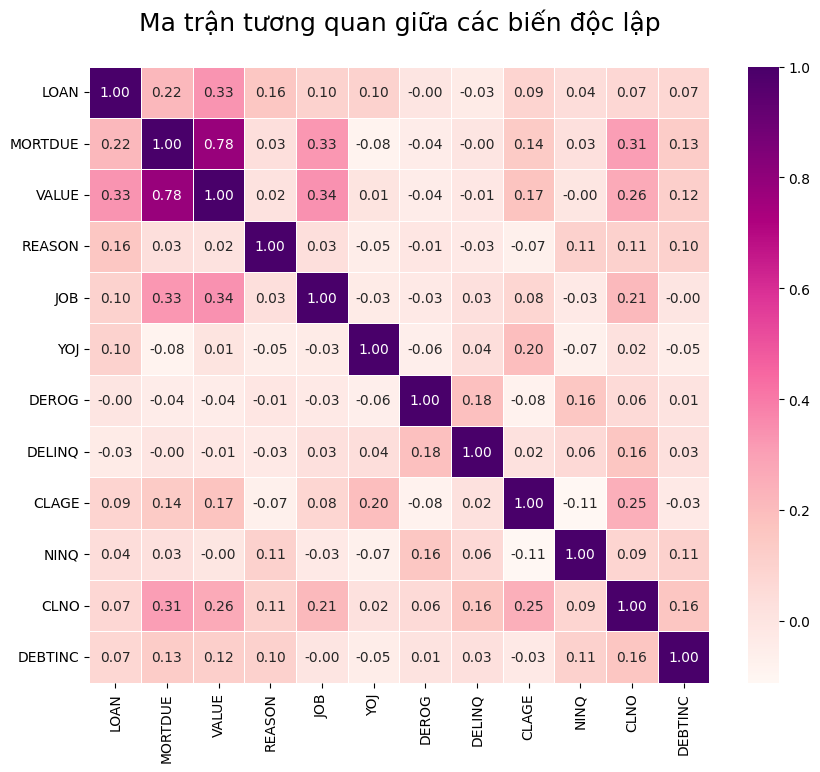

In [30]:
# Tạo biểu đồ ma trận tương quan
correlation_matrix = df_heatmap[['LOAN','MORTDUE','VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='RdPu',fmt=".2f", linewidths=0.7)
plt.title('Ma trận tương quan giữa các biến độc lập\n',fontsize=18)
plt.savefig('pictures/Biểu đồ ma trận tương quan giữa các biến độc lập.png')
plt.show()


# III. Xây dựng và triển khai mô hình

### III.1. Đánh giá mức độ ảnh hưởng của các biến đối với kết quả dự báo sử dụng phương pháp WOE

##### III.1.1. Tính toán WOE, IV cho từng biến độc lập

In [31]:
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

# Hàm để chia dữ liệu của mỗi cột thành các nhóm (bins)
def bins_columns(df, column, number_bins=10, qcut=None):
    try:
        # Sắp xếp và lấy dữ liệu cần thiết của mỗi cột
        X = df[[column, 'BAD']].sort_values(column)
        column_type = X[column].dtype

        # Xác định bins và thresholds
        if pd.api.types.is_numeric_dtype(column_type):
            if qcut is not None:
                bins, thresholds = pd.cut(X[column], bins=qcut, retbins=True)
            else:
                # Tạo bins dựa trên quantiles
                try:
                    bins, thresholds = pd.qcut(X[column], q=number_bins, retbins=True, duplicates='drop')
                    thresholds[0] = MIN_VAL
                    thresholds[-1] = MAX_VAL
                    bins = pd.cut(X[column], bins=thresholds)
                except Exception as e:
                    raise ValueError(f"Yêu cầu giảm số lượng bin (number_bins) của cột {column} để đảm bảo rằng các khoảng bin là hợp lệ! {e}")

            X['bins'] = bins
        else:
            X['bins'] = X[column]
            thresholds = None

        # Tạo bảng tổng hợp
        df_summary_BAD = pd.pivot_table(X, index=['bins'], values=['BAD'], columns=['BAD'], aggfunc={'BAD': np.size}, observed=False)
        df_summary_not_BAD = pd.pivot_table(X, index=['bins'], values=['BAD'], aggfunc={'BAD': np.size}, observed=False)

        if pd.api.types.is_numeric_dtype(column_type):
            df_threshold = pd.DataFrame({'Threshold': thresholds[1:]}, index=df_summary_BAD.index)
        else:
            df_threshold = pd.DataFrame(index=df_summary_BAD.index)
            thresholds = None

        df_summary_not_BAD.columns = ['Number of Observations']
        df_summary_BAD.columns = ['Bad', 'Good']

        df_summary = df_threshold.join(df_summary_not_BAD).join(df_summary_BAD, how='left').fillna(0)
        return df_summary, thresholds
    except Exception as e:
        raise ValueError(f"Lỗi khi xử lý cột {column}: {e}")

In [32]:
df_summary, thresholds = bins_columns(df, 'DELINQ', qcut=[MIN_VAL,0, 3, MAX_VAL])
df_summary

,Threshold,Number of Observations,Bad,Good
bins,,,,
"(-999999999, 0]",0,4179,3596,583
"(0, 3]",3,1613,1136,477
"(3, 999999999]",999999999,168,39,129


In [33]:
df_summary, thresholds = bins_columns(df, 'DEBTINC', number_bins=5)
df_summary

,Threshold,Number of Observations,Bad,Good
bins,,,,
"(-999999999.0, 29.214]",2.921447e+01,1192,1127,65
"(29.214, 33.78]",3.377992e+01,2156,1316,840
"(33.78, 34.688]",3.468780e+01,228,216,12
"(34.688, 38.956]",3.895595e+01,1192,1102,90
"(38.956, 999999999.0]",1.000000e+09,1192,1010,182


Input:
- df: DataFrame chứa dữ liệu của bộ dữ liệu sau khi đã làm sạch
- column: tên của cột trong df
- number_bins: số lượng nhóm để chia dữ liệu của mỗi cột
- qcut: tham số 
    - Nếu qcut = None thì sử dụng phương thức pd.qcut() để chia dữ liệu thành các nhóm dựa trên quantiles
    - Nếu qcut != None thì sử dụng phương thức pd.cut() với ngưỡng cắt được chỉ định

Output: 
- df_summary: DataFrame chứa thông tin tổng hợp về các nhóm 
    - Mỗi hàng tương ứng với một nhóm
    - 'Threshold': Ngưỡng cắt được sử dụng để chia nhóm (chỉ có nếu cột đầu vào là kiểu số).
    - 'Number of Observations': Số lượng mẫu trong mỗi nhóm.
    - 'Bad': Số lượng các mẫu xấu (Bad) trong mỗi nhóm.
    - 'Good': Số lượng các mẫu tốt (Good) trong mỗi nhóm.
- thresholds: mảng chứa các ngưỡng cắt được sử dụng để chia nhóm. Trả về nếu cột đầu vào là kiểu số 

Chú thích:
- qcut: ngưỡng cắt
- bins: mảng chứa các nhóm 
- thresholds: mảng chứa các giá trị cắt của các bins
- phương thức pd.cut() : được sử dụng để chia các giá trị của cột dữ liệu (X[column]) thành các bins dựa trên các giá trị cắt được chỉ định
- retbins = TRUE : trả về ranh giới của các bins 
- duplicates='drop' : các giá trị trùng lặp trong dữ liệu được loại bỏ khi tạo các bins

Tạo bins dựa trên quantiles: 
- Để giảm sự lệch lạc trong dữ liệu
- sử dụng phương thức pd.qcut() để chia dữ liệu thành các bins dựa trên quantiles, trong đó quantiles là các điểm cắt trong dữ liệu sao cho mỗi nhóm có số lượng mẫu gần như nhau
- Đặt giá trị cắt đầu tiên và cuối cùng của mảng thresholds để không có giá trị nào vượt ra ngoài giới hạn của các bins

Tạo bảng tổng hợp (pivot table) từ dữ liệu đã được chia thành các nhóm (bins) dựa trên giá trị trong cột 'BAD' để xem phân phối dữ liệu theo từng nhóm 
    
    df_summary_BAD = pd.pivot_table(X, index=['bins'], values=['BAD'], columns=['BAD'], aggfunc={'BAD':np.size})


Tạo bảng tổng hợp (pivot table) từ dữ liệu đã được chia thành bins không dựa trên giá trị trong cột 'BAD'
    
    df_summary_not_BAD = pd.pivot_table(X, index=['bins'], values=['BAD'], aggfunc={'BAD':np.size})


In [34]:
# Hàm tính các trọng số WOE ở mỗi bins và chỉ số IV cho từng biến
def WOE_and_IV(df, column, number_bins=None, min_obs=100, qcut=None):
    try:
        # Thống kê bins và lấy ra thresholds ban đầu
        df_summary, thresholds = bins_columns(df, column, number_bins=number_bins, qcut=qcut)
        
        # Thay thế giá trị 0 của #BAD trong df_summary bằng 1 để không bị lỗi chia cho 0
        df_summary['Bad'] = df_summary['Bad'].replace({0: 1})
    
        if qcut is not None:
            # Lọc bỏ threshold để tạo thành threshold mới mà thỏa mãn số lượng quan sát >= min_obs
            exclude_ind = np.where(df_summary['Number of Observations'] <= min_obs)[0]
            if exclude_ind.any(): # Kiểm tra mảng exclude_ind có phần tử nào không
                new_thresholds = np.delete(thresholds, exclude_ind)
                print('Tự động điều chỉnh {} bins thành {} bins'.format(number_bins, new_thresholds.shape[0] - 1))
                # Tính toán lại bảng summary
                df_summary, thresholds = bins_columns(df, column, qcut=new_thresholds)

        new_thresholds = thresholds

        # Tính tỷ lệ Good/Bad cho mỗi bin
        df_summary['Good/Bad'] = df_summary['Good']/df_summary['Bad'] 

        # Tính tỷ lệ phần trăm cho 'Bad' và 'Good' so với tổng 'Bad', 'Good'
        df_summary['%Bad'] = df_summary['Bad']/df_summary['Bad'].sum() 
        df_summary['%Good'] = df_summary['Good']/df_summary['Good'].sum()

        # Tính WOE, IV 
        df_summary['WOE'] = np.log(df_summary['%Good']/df_summary['%Bad'])
        df_summary['IV'] = (df_summary['%Good']-df_summary['%Bad'])*df_summary['WOE']
        
        df_summary['COLUMN'] = column
        IV = df_summary['IV'].sum()
        print('Giá trị thông tin (IV) của cột {} là: {}'.format(column, IV))
        return df_summary, IV, new_thresholds
    except ValueError as e:
        print(f"Lỗi trong hàm WOE_and_IV cho cột {column}: {e}")
        return None, None, None
    except Exception as e:
        print(f"Lỗi không xác định trong hàm WOE_and_IV cho cột {column}: {e}")
        return None, None, None


In [35]:
df_summary, IV, thres = WOE_and_IV(df, 'DEBTINC', number_bins = 7, min_obs= 100)
df_summary

Giá trị thông tin (IV) của cột DEBTINC là: 1.3795573580411762


,Threshold,Number of Observations,Bad,Good,Good/Bad,%Bad,%Good,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 27.028]",2.702826e+01,852,800,52,0.065000,0.167680,0.043734,-1.343925,0.166573,DEBTINC
"(27.028, 31.875]",3.187511e+01,851,808,43,0.053218,0.169357,0.036165,-1.543919,0.205637,DEBTINC
"(31.875, 33.78]",3.377992e+01,1645,835,810,0.970060,0.175016,0.681245,1.359046,0.687988,DEBTINC
"(33.78, 34.043]",3.404341e+01,58,56,2,0.035714,0.011738,0.001682,-1.942761,0.019535,DEBTINC
"(34.043, 37.18]",3.717985e+01,851,783,68,0.086845,0.164117,0.057191,-1.054182,0.112719,DEBTINC
"(37.18, 40.133]",4.013282e+01,851,804,47,0.058458,0.168518,0.039529,-1.450008,0.187035,DEBTINC
"(40.133, 999999999.0]",1.000000e+09,852,685,167,0.243796,0.143576,0.140454,-0.021982,0.000069,DEBTINC


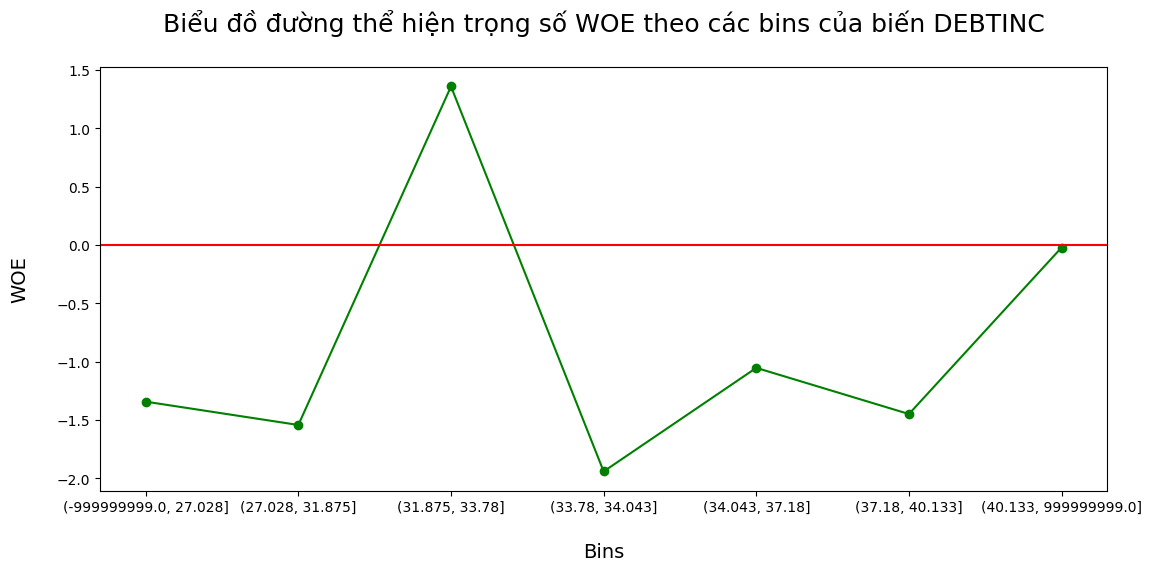

In [36]:
# Hàm vẽ biểu đồ WOE của các bins nhưng ta lấy thông tin df_summary ngay ở trên tức là df_summary đối với biến DEBTINC
def plot_WOE(df_summary):
    column_name = list(df_summary['COLUMN'].unique())[0]
    plt.figure(figsize=(13, 5.5))
    plt.title(f'Biểu đồ đường thể hiện trọng số WOE theo các bins của biến {column_name}\n',fontsize=18)
    df_summary['WOE'].plot(linestyle='-', marker='o', color = 'green')
    plt.axhline(y=0, color='red')
    plt.xticks(rotation=0)
    plt.ylabel('WOE\n',fontsize =14)
    plt.xlabel('\nBins',fontsize =14)
    plt.show()

plot_WOE(df_summary)

WOE < 0: Cho thấy tỷ lệ phần trăm khách hàng "xấu" (Bad) cao hơn tỷ lệ phần trăm khách hàng "tốt" (Good) trong bin đó.

WOE > 0: Cho thấy tỷ lệ phần trăm khách hàng "tốt" (Good) cao hơn tỷ lệ phần trăm khách hàng "xấu" (Bad) trong bin đó.

In [37]:
# Giá trị thông tin (IV) của từng cột 
WOE_dict = {}
number_bins_column = {'LOAN': 10, 'MORTDUE': 10, 'VALUE': 10, 'YOJ': 10, 'CLAGE': 10, 'NINQ': 2, 'CLNO': 10, 'DEBTINC': 7, 'DEROG': 5, 'DELINQ': 5, 'REASON': None, 'JOB': None}

for col, bins in number_bins_column.items():
    # Đối với biến có xu hướng là biến thứ bậc hơn là biến liên tục
    if col in ['DEROG', 'DELINQ']:
        df_summary, IV, thresholds = WOE_and_IV(df, column=col, number_bins=5, qcut=[MIN_VAL, 2, MAX_VAL])
    # Đối với biến phân loại
    elif col in ['REASON', 'JOB']:
        df_summary, IV, thresholds = WOE_and_IV(df, column=col)
    # Đối với biến định lượng
    else:
        df_summary, IV, thresholds = WOE_and_IV(df, column=col, number_bins=bins)
        
    if df_summary is not None:
        WOE_dict[col] = {'table': df_summary, 'IV': IV}

Giá trị thông tin (IV) của cột LOAN là: 0.1601563338988017
Giá trị thông tin (IV) của cột MORTDUE là: 0.05131351983314017
Giá trị thông tin (IV) của cột VALUE là: 0.14188912125986042
Giá trị thông tin (IV) của cột YOJ là: 0.06714693781095009
Giá trị thông tin (IV) của cột CLAGE là: 0.22171042878294653
Giá trị thông tin (IV) của cột NINQ là: 0.06965935231976197
Giá trị thông tin (IV) của cột CLNO là: 0.06043698467606807
Giá trị thông tin (IV) của cột DEBTINC là: 1.3795573580411762
Giá trị thông tin (IV) của cột DEROG là: 0.19008112833205368
Giá trị thông tin (IV) của cột DELINQ là: 0.3366699247263777
Giá trị thông tin (IV) của cột REASON là: 0.008618460238864025
Giá trị thông tin (IV) của cột JOB là: 0.07787316133784931


- Trong trường hợp một bin có số lượng quan sát nhỏ hơn một ngưỡng tối thiểu ta sẽ ghép nó vào bin liền trước

- np.where(df_summary['No_Obs'] <= min_obs)[0] chỉ lấy phần tử đầu tiên của tuple kết quả, nơi chứa một mảng các chỉ mục thỏa mãn điều kiện.

##### III.1.2. Xếp hạng các biến dựa trên giá trị thông tin (IV)

In [38]:
columns = []
IV_of_column = []
for col in df.columns:
    if col != 'BAD':
        columns.append(col)
        IV_of_column.append(WOE_dict[col]['IV'])

# Tạo DataFrame 
df_WOE = pd.DataFrame({'Column': columns, 'IV': IV_of_column})

# Hàm xếp hạng cột dựa trên giá trị IV
def rank_column(iv):
    if iv < 0.02:
        return 'Useless'
    elif iv < 0.1:
        return  'Weak'
    elif iv < 0.3:
        return 'Medium'
    elif iv < 0.5:
        return 'Strong'
    else:
        return 'Suspicious'

df_WOE['Rank'] = df_WOE['IV'].apply(lambda x: rank_column(x))
df_WOE = df_WOE.sort_values('IV', ascending=False)
df_WOE['Top'] = range(1,len(df_WOE)+1)
df_WOE

,Column,IV,Rank,Top
11,DEBTINC,1.379557,Suspicious,1
7,DELINQ,0.336670,Strong,2
8,CLAGE,0.221710,Medium,3
6,DEROG,0.190081,Medium,4
0,LOAN,0.160156,Medium,5
2,VALUE,0.141889,Medium,6
4,JOB,0.077873,Weak,7
9,NINQ,0.069659,Weak,8
5,YOJ,0.067147,Weak,9
10,CLNO,0.060437,Weak,10


Kết quả phân tích cho thấy rằng trong quá trình phân loại khách hàng nợ xấu, biến REASON không có ảnh hưởng đáng kể. Các biến còn lại đều đóng vai trò hỗ trợ trong việc phân loại khách hàng. Cụ thể, các biến có ảnh hưởng lớn nhất là DELINQ và DEBTINC, cho thấy mức độ quan trọng của chúng trong việc phân loại. Tiếp theo là các biến CLAGE, DEROG, LOAN, và VALUE, có mức độ ảnh hưởng trung bình. Các biến còn lại như JOB, NINQ, YOJ, CLNO và MORTDUE cũng có tác động đến quá trình phân loại, nhưng mức độ ảnh hưởng không lớn bằng.

Đặc biệt, DEBTINC nổi bật với mức độ ảnh hưởng rất cao, tuy nhiên, cần phải cẩn trọng với nó để tránh hiện tượng overfitting. Điều quan trọng là DELINQ được xem là biến có tương quan lớn nhất đối với quá trình phân loại khách hàng nợ xấu. Do đó, trong quá trình phân loại, sự chú ý đặc biệt nên được dành cho DELINQ.

### III.2. Huấn luyện mô hình sử dụng hồi quy Logistic

##### III.2.1. Chuẩn bị dữ liệu

In [39]:
# Tính toán các biến WOE bằng cách ánh xạ mỗi khoảng bin tương tứng với giá trị WOE của nó
for col in WOE_dict.keys():
    try:
        key = list(WOE_dict[col]['table']['WOE'].index) # Lấy danh sách các khoảng bin của biến
        woe = list(WOE_dict[col]['table']['WOE']) # Lấy danh sách các giá trị WOE tương ứng với các khoảng bin
        d = dict(zip(key, woe)) # Tạo một từ điển ánh xạ khoảng bin sang giá trị WOE
        col_woe = col + '_WOE' # Tạo tên mới cho biến
        df[col_woe] = df[col].map(d) # Ánh xạ giá trị của biến gốc sang giá trị WOE tương ứng
    except:
        print(col)


In [40]:

# Gán giá trị đầu vào là các biến WOE và biến mục tiêu là BAD trong df
X = df.filter(like='_WOE', axis=1)
y = df['BAD']

In [41]:
# Xử lý giá trị NaN trong X
if X.isnull().values.any():
    # Thay thế các giá trị NaN bằng giá trị trung bình của cột 
    X = X.fillna(X.mean())

In [42]:
# Phân chia tập train/test với tỷ lệ kích thước mẫu là 80:20.
# Tỷ lệ của Good/Bad cân bằng trên cả train và test
from sklearn.model_selection import train_test_split

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.2, stratify=y, shuffle=True, random_state=123)

# Kiểm tra kích thước của các tập dữ liệu
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4768, 12)
X_test shape:  (1192, 12)
y_train shape:  (4768,)
y_test shape:  (1192,)


##### III.2.2. Xây dựng phương trình hồi quy Logistic

In [43]:
from sklearn.linear_model import LogisticRegression

# Tạo mô hình hồi quy Logistic
logistic_model = LogisticRegression(solver= 'lbfgs', 
                                    max_iter=1000, 
                                    fit_intercept=True, 
                                    tol=0.0001, 
                                    C=1, 
                                    penalty='l2')

# Huấn luyện mô hình trên tập huấn luyện
logistic_model.fit(X_train, y_train)

# Hiển thị các tham số của mô hình
logistic_model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### III.2.3. Đánh giá mô hình

**Độ chính xác (Accuracy)**

In [44]:
from sklearn.metrics import accuracy_score

y_predict_train = logistic_model.predict(X_train) # Dự đoán trên tập huấn luyện
acc_train = accuracy_score(y_predict_train,y_train) # Độ chính xác trên tập huấn luyện
y_predict_test = logistic_model.predict(X_test) # Dự đoán trên tập kiểm tra 
acc_test = accuracy_score(y_predict_test,y_test) # Độ chính xác trên tập kiểm tra 

print(f'Độ chính xác trên tập huấn luyện (train): {acc_train * 100:.2f}%')
print(f'Độ chính xác trên tập kiểm tra (test): {acc_test * 100:.2f}%')


Độ chính xác trên tập huấn luyện (train): 86.45%
Độ chính xác trên tập kiểm tra (test): 85.32%


Accuracy (độ chính xác) là một chỉ số đo lường hiệu suất của một mô hình phân loại. Nó được tính bằng tỷ lệ phần trăm số lượng dự đoán đúng trên tổng số dự đoán. Trong bối cảnh của một mô hình phân loại, độ chính xác là tỉ lệ giữa số lượng dự đoán chính xác và tổng số dự đoán.

Công thức tính độ chính xác:

Accuracy = Số lượng dự đoán đúng / Tổng số dự đoán 

VD: Giả sử bạn có một tập dữ liệu với 100 mẫu và mô hình của bạn dự đoán chính xác nhãn cho 90 trong số 100 mẫu đó, thì độ chính xác sẽ là:

=> Accuracy = 90/100 = 90%



**Đường cong ROC và chỉ số AUC**

C:\Users\ngoce\AppData\Local\Temp\ipykernel_8404\2338636191.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='Đường ROC (auc = %0.2f)'%auc)
C:\Users\ngoce\AppData\Local\Temp\ipykernel_8404\2338636191.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='Đường ROC (auc = %0.2f)'%auc)


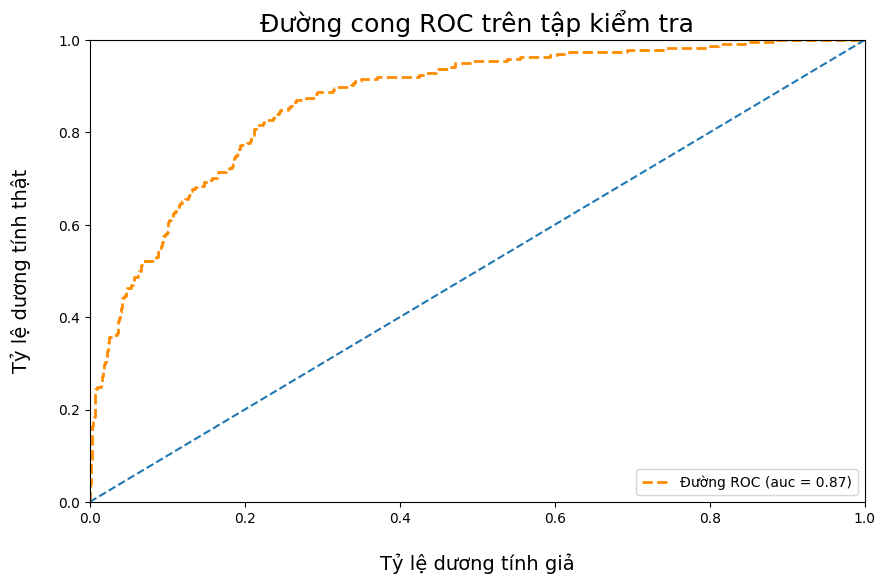

In [45]:
from sklearn.metrics import roc_curve, auc
# Tính toán xác suất dự đoán trên tập kiểm tra
y_predict_proba_test = logistic_model.predict_proba(X_test)[:, 1]
# Tính toán các giá trị fpr, tpr, thres
fpr, tpr, thres = roc_curve(y_test, y_predict_proba_test)
# Tính toán AUC
roc_auc = auc(fpr, tpr)

def plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 6))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='Đường ROC (auc = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('\nTỷ lệ dương tính giả',fontsize=14)
    plt.ylabel('Tỷ lệ dương tính thật\n',fontsize=14)
    plt.legend(loc='lower right')
    plt.title('Đường cong ROC trên tập kiểm tra', fontsize=18)
    plt.savefig('pictures/Đường cong ROC trên tập kiểm tra.png')

plot_roc_curve(fpr, tpr, thres, roc_auc)

Chỉ số AUC (area under curve) đo lường phần diện tích nằm dưới đường cong ROC cho biết khả năng phân loại của các hợp đồng Good/Bad của mô hình hồi quy Logistic là mạnh hay yếu. AUC thuộc [0,1], giá trị của nó càng lớn thì mô hình càng tốt. Đối với mô hình hồi quy logistic này, AUC = 0.87 là khá cao, cho thấy khả năng dự báo của mô hình tốt và có thể áp dụng mô hình vào thực tiễn.

**Đường cong precision và recall trên tập huấn luyện**

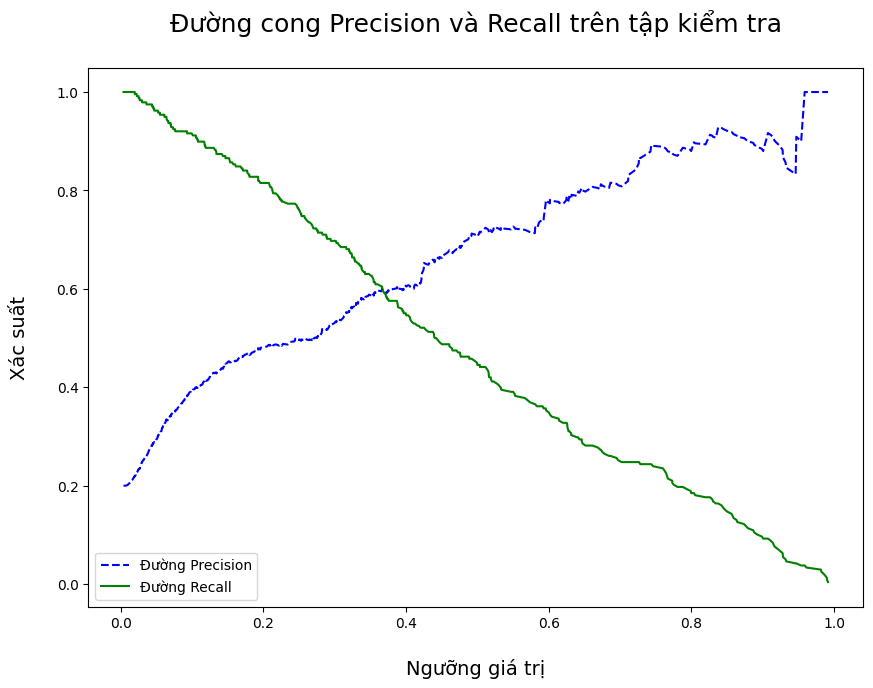

In [46]:
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_test, y_predict_proba_test)

def plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 7))
    plt.plot(thres, prec[:-1], 'b--', label = 'Đường Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Đường Recall')
    plt.xlabel('\nNgưỡng giá trị',fontsize=14)
    plt.ylabel('Xác suất\n',fontsize=14)
    plt.title('Đường cong Precision và Recall trên tập kiểm tra\n',fontsize=18)
    plt.legend()
    plt.savefig('pictures/Đường cong Precision và Recall trên tập kiểm tra')

plot_prec_rec_curve(precision, recall, thres)

Giải thích đồ thị:

Trục X: Ngưỡng giá trị – đây là các giá trị mà tại đó chúng ta quyết định xem một mẫu có thuộc lớp "Good" (không vỡ nợ) hay không dựa trên xác suất dự đoán.

Trục Y: Xác suất – biểu diễn giá trị của Precision và Recall.

Đường cong Precision – tỷ lệ dự báo chính xác trong số các khách hàng được dự báo không vỡ nợ là Good (tức nhãn là 1).

Đường cong Recall – tỷ lệ dự báo chính xác các khách hàng không vỡ nợ trên thực tế.

**Kiểm định Kolmogorov-Smirnov (K-S)**

In [47]:
# Tính toán phân phối xác suất tích lũy của Good và Bad
def CPD(y_predict, number_bins):
    _, thresholds = pd.qcut(y_predict, q=number_bins, retbins=True)
    cmd_Bad = []
    cmd_Good = []
    Bad_ID = set(np.where(y_test == 0)[0])
    Good_ID = set(np.where(y_test == 1)[0])
    total_Bad = len(Bad_ID)
    total_Good = len(Good_ID)
    
    for thres in thresholds:
        predict_id = set(np.where(y_predict <= thres)[0])

        # Đếm phần trăm số lượng khách hàng nợ xấu (Bad) có xác suất dự báo <= thres
        percent_Bad = len(predict_id.intersection(Bad_ID)) / total_Bad
        cmd_Bad.append(percent_Bad)

        # Đếm phần trăm số lượng khách hàng không nợ xấu (Good) có xác suất dự báo <= thres
        percent_Good = len(predict_id.intersection(Good_ID)) / total_Good
        cmd_Good.append(percent_Good)

    cmd_Bad = np.array(cmd_Bad)
    cmd_Good = np.array(cmd_Good)
    return cmd_Bad, cmd_Good, thresholds

cmd_Bad, cmd_Good, thresholds = CPD(y_predict_proba_test, number_bins=20)

*Chú thích: CPD (cumulative probability distribution): phân phối xác suất tích lũy*

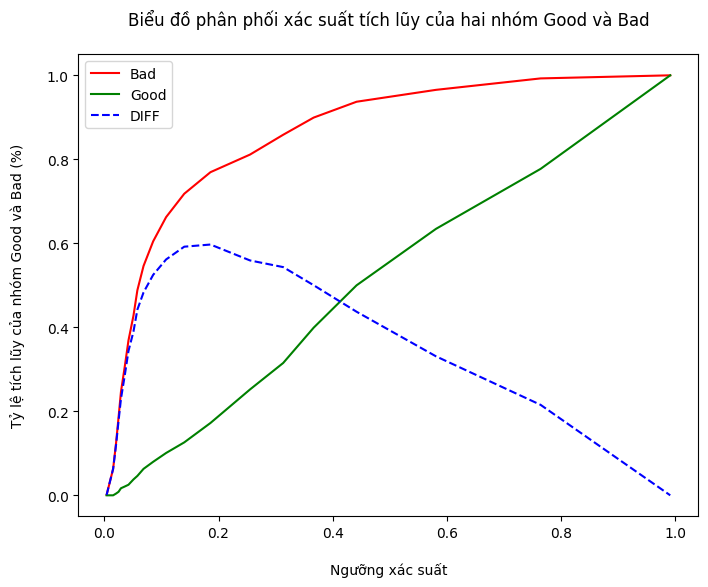

In [48]:
# Biểu đồ phân phối xác suất tích lũy của Good và Bad
def plot_CPD(cmd_Bad, cmd_Good, thresholds):
    plt.figure(figsize=(8,6))
    plt.plot(thresholds, cmd_Bad, 'r-', label='Bad')
    plt.plot(thresholds, cmd_Good, 'g-', label='Good')
    plt.plot(thresholds, cmd_Bad - cmd_Good, 'b--', label='DIFF')
    plt.xlabel('\nNgưỡng xác suất')
    plt.ylabel('Tỷ lệ tích lũy của nhóm Good và Bad (%)\n')
    plt.title('Biểu đồ phân phối xác suất tích lũy của hai nhóm Good và Bad\n')
    plt.legend()
    plt.savefig('pictures/Biểu đồ phân phối xác suất tích lũy của hai nhóm Good và Bad.png')

plot_CPD(cmd_Bad, cmd_Good, thresholds)


Trục x biểu diễn các giá trị ngưỡng xác suất (thresholds) được sử dụng để chia xác suất dự đoán thành các khoảng bằng nhau.

Trục y biểu diễn tỷ lệ tích lũy (%) của các khách hàng trong mỗi nhóm (Good và Bad) có xác suất dự đoán nhỏ hơn hoặc bằng các giá trị ngưỡng trên trục X.

Đường DIFF giúp đo lường sự khác biệt giữa hai tỷ lệ tích lũy này tại mỗi ngưỡng.

In [49]:
# Kiểm định phân phối xác suất tích lũy
from scipy import stats

stats.ks_2samp(cmd_Bad, cmd_Good)

KstestResult(statistic=0.5238095238095238, pvalue=0.005467427576534314, statistic_location=0.1722689075630252, statistic_sign=-1)

Kết quả của K-S test cung cấp thông tin về mức độ tương tự giữa hai phân phối xác suất


##### III.2.4. Tính điểm tín dụng cho khách hàng

**Tính điểm số các bin cho mỗi feature**

In [50]:
# Hàm tính điểm số các bin cho mỗi feature

def score_each_bin(beta, beta_0, woe, number_variables = 12, odds = 1/4, pdo = -50, threshold_score = 600):
    factor = pdo / np.log(2)
    offset = threshold_score - factor * np.log(odds)
    score = (beta * woe + beta_0 / number_variables) * factor + offset / number_variables
    return score


Input:
- beta : hệ số hồi quy cho feature
- beta_0 : hệ số chặn hồi quy
- woe : trọng số bằng chứng cho bin thứ i của đặc trưng 
- number_variables : tổng số đặc trưng của mô hình.
- odds :  tỷ lệ odds cơ bản được dùng để thiết lập điểm số cơ bản.
- pdo (Points to Double Odds) : số điểm cần thiết để gấp đôi tỷ lệ odds. PDO là một giá trị cố định dùng để điều chỉnh mức độ nhạy của điểm số so với sự thay đổi của tỷ lệ odds.
- threshold_score: điểm số ngưỡng mà từ đó điểm số được tính toán, thường thì điểm ngưỡng này là điểm cơ sở mà từ đó, các điểm khác được tính toán.

Để thiết lập odds cơ bản, ta chọn odds = 1/4 đại diện cho tỷ lệ giữa khả năng "Good" và "Bad" của một sự kiện, trong đó xác suất sự kiện "Good" xảy ra bằng 1/4 lần xác suất sự kiện "Bad".

Do pdo là số điểm cần thiết để gấp đôi tỷ lệ odds của sự kiện nên ta chọn pdo = -50, nghĩa là  mỗi khi điểm giảm 50, khả năng xảy ra của sự kiện 'Bad' sẽ tăng gấp đôi, làm tăng tỷ lệ odds lên gấp đôi. Số âm ở đây chỉ rằng, điểm cao hơn dẫn đến khả năng 'Good' cao hơn và ngược lại, điểm thấp hơn dẫn đến khả năng 'Bad' cao hơn. Điều này giúp ngân hàng hoặc tổ chức tài chính xác định rõ ràng mức độ rủi ro tín dụng dựa trên điểm số, từ đó đưa ra quyết định cấp tín dụng phù hợp.

Ở đây, chúng ta đã chọn threshold_score = 600. Giá trị này thường được xem là một điểm cắt để phân biệt giữa các khách hàng có khả năng tín dụng cao và thấp. Điểm 600 được coi là một mức độ tín dụng trung bình hoặc tối thiểu mà tại đó, khách hàng được coi là có khả năng tín dụng đủ tốt để nhận được các điều kiện tín dụng thuận lợi hơn. Các điểm số cao hơn 600 thường được liên kết với khả năng tín dụng tốt hơn và ngược lại, điểm số thấp hơn 600 cho thấy rủi ro tín dụng cao hơn. Việc sử dụng threshold_score như một tiêu chuẩn cho phép ngân hàng hoặc tổ chức tài chính đánh giá một cách hệ thống các ứng viên tín dụng, phân loại họ theo mức độ rủi ro, và quản lý cấp tín dụng một cách hiệu quả.

In [51]:
# Gán các giá trị beta, beta_0 vào dictionary
beta_dict = dict(zip(list(X_train.columns), logistic_model.coef_[0]))
beta_0 = logistic_model.intercept_[0]
beta_dict

{'LOAN_WOE': 0.4157980243766653,
 'MORTDUE_WOE': 0.6547775856138018,
 'VALUE_WOE': 0.7503153823689259,
 'YOJ_WOE': 0.9208998784195482,
 'CLAGE_WOE': 0.8642779912682559,
 'NINQ_WOE': 0.5026036263878354,
 'CLNO_WOE': 0.8536441525679003,
 'DEBTINC_WOE': 0.9437787128116036,
 'DEROG_WOE': 0.9138552031715337,
 'DELINQ_WOE': 1.0576606755667197,
 'REASON_WOE': 0.7542868431655829,
 'JOB_WOE': 0.7443247013931614}

In [52]:
# Tính điểm số cho từng bin 
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
    for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
        cols.append(col)
        # Thêm feature
        feature = str(feature)
        features.append(feature)

        # Thêm woe
        woe = woe.values[0]
        woes.append(woe)

        # Thêm beta
        col_woe = col + '_WOE'
        beta = beta_dict[col_woe]
        betas.append(beta)

        # Thêm score
        score = score_each_bin(beta=beta, beta_0=beta_0, woe=woe, number_variables=12)
        scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes,'Betas': betas,'Scores': scores})

print("Bảng điểm số cho từng bin của mỗi feature\n\n")
df_WOE

Bảng điểm số cho từng bin của mỗi feature




,Columns,Features,WOE,Betas,Scores
0,LOAN,"(-999999999.0, 7600.0]",0.898910,0.415798,23.028515
1,LOAN,"(7600.0, 10000.0]",0.154566,0.415798,45.353969
2,LOAN,"(10000.0, 12100.0]",-0.112535,0.415798,53.365277
3,LOAN,"(12100.0, 14400.0]",-0.158318,0.415798,54.738456
4,LOAN,"(14400.0, 16300.0]",0.162082,0.415798,45.128541
...,...,...,...,...,...
77,DEBTINC,"(31.875, 33.78]",1.359046,0.943779,-42.532866
78,DEBTINC,"(33.78, 34.043]",-1.942761,0.943779,182.251659
79,DEBTINC,"(34.043, 37.18]",-1.054182,0.943779,121.757837
80,DEBTINC,"(37.18, 40.133]",-1.450008,0.943779,148.705418


**Tính điểm tín dụng cho một khách hàng ngẫu nhiên**

In [53]:
# Lấy ngẫu nhiên một khách hàng trong bộ dữ liệu
customer_test = df[columns].sample(n=1)
customer_test

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4421,23000,76561.0,111389.0,DebtCon,Mgr,8.0,0.0,1.0,301.232911,2.0,28.0,30.346706


In [54]:
# Hàm tính điểm số cho mỗi đặc trưng của khách hàng
def score_each_column(customer, col):
    feature_customer = [str(inter) for inter in list(WOE_dict[col]['table'].index) if customer[col].values[0] in inter]
    score_column = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature_customer[0])]['Scores'].values[0]
    return score_column

In [55]:
# Hàm tính điểm tín dụng của toàn bộ các đặc trưng của khách hàng
def total_score_columns(customer, columns=columns):
    scores = {}
    for col in columns:
        scores[col] = score_each_column(customer, col)
    total_scores = sum(scores.values())
    return scores, total_scores

In [56]:
scores, total_scores = total_score_columns(customer_test)
print('Điểm số cho mỗi đặc trưng: \n')
df_score_each_column = pd.DataFrame(list(scores.items()), columns=['Đặc trưng', 'Điểm số'])
print(df_score_each_column)
print('\nTổng điểm tín dụng của khách hàng: ', total_scores)
customer_index = customer_test.index[0] 
customer_status = df.loc[customer_index, 'BAD']
print('\nTrạng thái trả nợ của khách hàng này trên thực tế: ',customer_status)

Điểm số cho mỗi đặc trưng: 

   Đặc trưng     Điểm số
0       LOAN   54.916812
1    MORTDUE   66.844942
2      VALUE   19.698914
3     REASON   53.404296
4        JOB   39.246125
5        YOJ   58.560788
6      DEROG   55.142370
7     DELINQ   62.474168
8      CLAGE   98.740185
9       NINQ   37.934961
10      CLNO   46.042240
11   DEBTINC  155.098759

Tổng điểm tín dụng của khách hàng:  748.1045598300013

Trạng thái trả nợ của khách hàng này trên thực tế:  0


**Tính điểm tín dụng cho toàn bộ khách hàng trên tập dữ liệu**

In [57]:
total_score_data = []
for i in np.arange(df[columns].shape[0]):
    customers = df[columns].iloc[i:(i+1), :]
    _, scores = total_score_columns(customers)
    total_score_data.append(scores)

df['Score'] = total_score_data
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,YOJ_WOE,CLAGE_WOE,NINQ_WOE,CLNO_WOE,DEBTINC_WOE,DEROG_WOE,DELINQ_WOE,REASON_WOE,JOB_WOE,Score
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,...,0.094209,0.386975,-0.210721,0.484269,1.359046,-0.078161,-0.163633,0.138124,0.102366,379.270114
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,...,-0.129023,0.288596,-0.210721,-0.170345,1.359046,-0.078161,-0.163633,0.138124,0.102366,507.064556
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,...,0.288849,0.302004,-0.210721,0.484269,1.359046,-0.078161,-0.163633,0.138124,0.102366,371.637845
3,1,1500,73760.8172,101776.048741,Unknown,Other,8.922268,0.25457,0.449442,178.635811,...,-0.027355,0.032257,0.332504,0.048611,1.359046,-0.078161,-0.163633,-0.057476,0.102366,466.984511
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,...,0.288849,0.386975,-0.210721,-0.170345,1.359046,-0.078161,-0.163633,0.138124,-0.495199,466.176619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.00000,0.000000,221.808718,...,0.060778,-0.311344,-0.210721,-0.170345,-1.054182,-0.078161,-0.163633,-0.062752,0.102366,749.764535
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.00000,0.000000,208.692070,...,0.060778,-0.431992,-0.210721,-0.170345,-1.054182,-0.078161,-0.163633,-0.062752,0.102366,757.286244
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.00000,0.000000,212.279697,...,0.060778,-0.311344,-0.210721,-0.170345,-1.054182,-0.078161,-0.163633,-0.062752,0.102366,749.764535
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.00000,0.000000,213.892709,...,0.094209,-0.311344,-0.210721,-0.170345,-1.054182,-0.078161,-0.163633,-0.062752,0.102366,750.577762


In [58]:
df.to_excel('customer_data.xlsx',index=True)

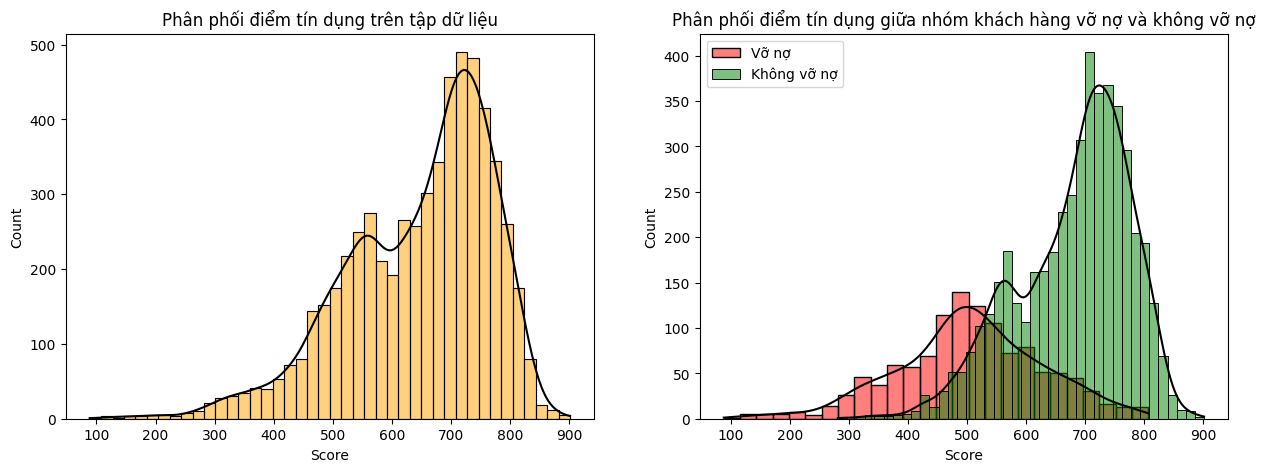

In [59]:
# Biểu đồ phân phối của điểm số theo Good và Bad

plt.figure(figsize=(15,5))

# Vẽ biểu đồ phân phối cho tất cả các điểm
plt.subplot(121)
a1 = sns.histplot(df['Score'], kde=True, color="orange")
a1.lines[0].set_color('black')
plt.title('Phân phối điểm tín dụng trên tập dữ liệu')

# Vẽ biểu đồ phân phối điểm cho các nhóm Bad và Good
plt.subplot(122)
a2 = sns.histplot(df[df['BAD'] == 1]['Score'], color="red", label='Vỡ nợ', kde=True, alpha=0.5)
a2.lines[0].set_color('black')
sns.histplot(df[df['BAD'] == 0]['Score'], color="green", label='Không vỡ nợ', kde=True, alpha=0.5)
a2.lines[1].set_color('black')
plt.legend(loc = 'upper left')
plt.title('Phân phối điểm tín dụng giữa nhóm khách hàng vỡ nợ và không vỡ nợ')

plt.show()


##### III.2.5. Phân loại khách hàng theo nhóm điểm dựa trên hệ thống điểm FICO

In [60]:
# Hàm phân loại khách hàng theo nhóm điểm 
def categorize_fico(score):
    if score < 580:
        return "Poor (300 - 579)"
    elif score < 670:
        return "Fair (580 - 669)"
    elif score < 740:
        return "Good (670 - 739)"
    elif score < 800:
        return "Very Good (740 - 799)"
    else:
        return "Excellent (800 - 850)"

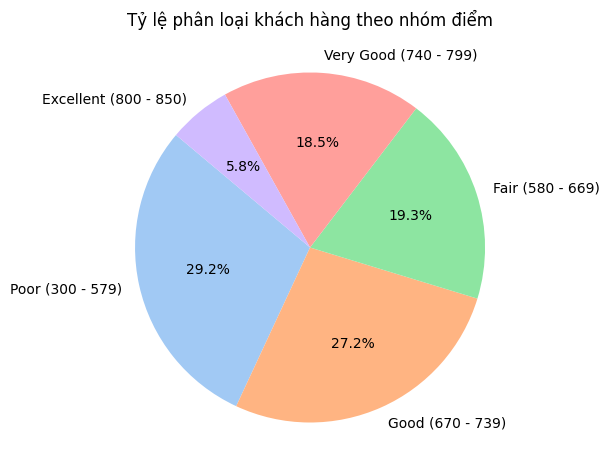

In [61]:
# Tạo biểu đồ tròn hiển thị tỷ lệ phân loại khách hàng theo nhóm điểm
df['Category_FICO'] = df['Score'].apply(categorize_fico)
customer_counts_fico = df['Category_FICO'].value_counts().reset_index() # Đếm số lượng khách hàng trong mỗi nhóm điểm FICO
customer_counts_fico.columns = ['Category', 'Count']
plt.figure(figsize=(7,5))
plt.pie(customer_counts_fico['Count'], labels=customer_counts_fico['Category'],autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title("Tỷ lệ phân loại khách hàng theo nhóm điểm\n")
plt.savefig("pictures/Tỷ lệ phân loại khách hàng theo nhóm điểm.png")
plt.show()